<font size='5'> Name: Parth Jitendra Vaya </font>

<font size='5'> Logistic Map </font> 

<font size='4'> Part a) An algorithm was implemented which iterates the logistic map. This algorithm works by taking in some initial parameters for x0 and r. Then, x0 is assigned as the first value to an empty array and the equation above is implemented which fills up the rest of the array according to the equation. This iteration occurs 200 times (n), which means the total length of the x array was also n. Then x is plotted against n and this gives us our logistic map. Yes, the results were in agreement with the general statements discussed in class, since as seen in the diagrams below, the plots show a change in behavior according to their initial conditions and value of r.
 </font>


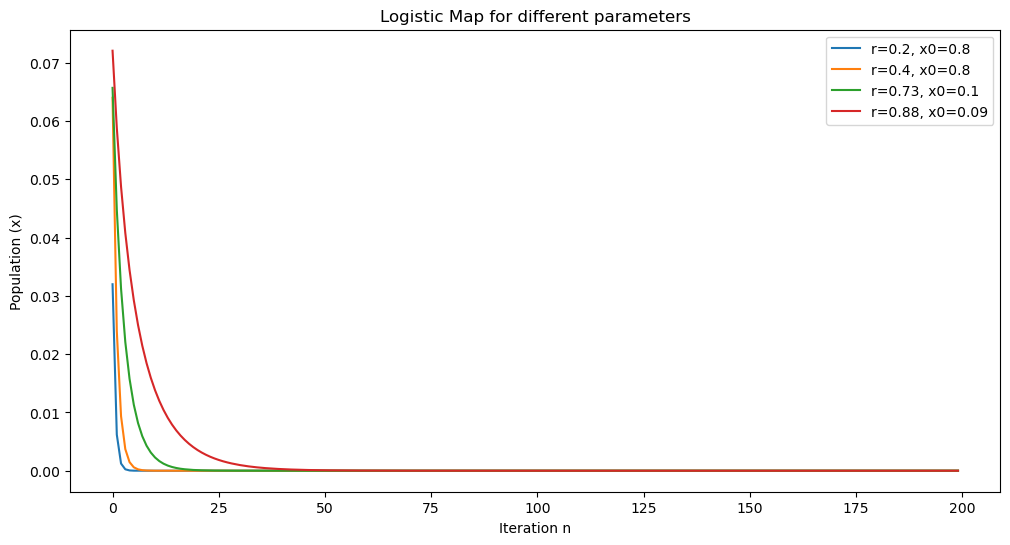

In [33]:
import numpy as np
import matplotlib.pyplot as plt

def logistic_map(r, x, n):
    result = []
    for _ in range(n):
        x = r * x * (1 - x)
        result.append(x)
    return result

# Parameters
n_iterations = 200
x0_values = [0.8, 0.8, 0.1, 0.09]
r_values = [0.2, 0.4, 0.73, 0.88]

# Create a bifurcation diagram
fig, ax = plt.subplots(figsize=(12, 6))

# Add x values
x = np.linspace(0, n_iterations - 1, n_iterations)

for x0, r in zip(x0_values, r_values):
    x_values = logistic_map(r, x0, n_iterations)
    plt.plot(x, x_values, label=f'r={r}, x0={x0}')
        

ax.set_title('Logistic Map for different parameters')
ax.set_xlabel('Iteration n')
ax.set_ylabel('Population (x)')
ax.legend ()
plt.show()


<font size='4'> Part b) The same iterative for loop was implemented with the function changed as in the question. Below the diagrams show maps for an exponential function and for a sine function. </font>

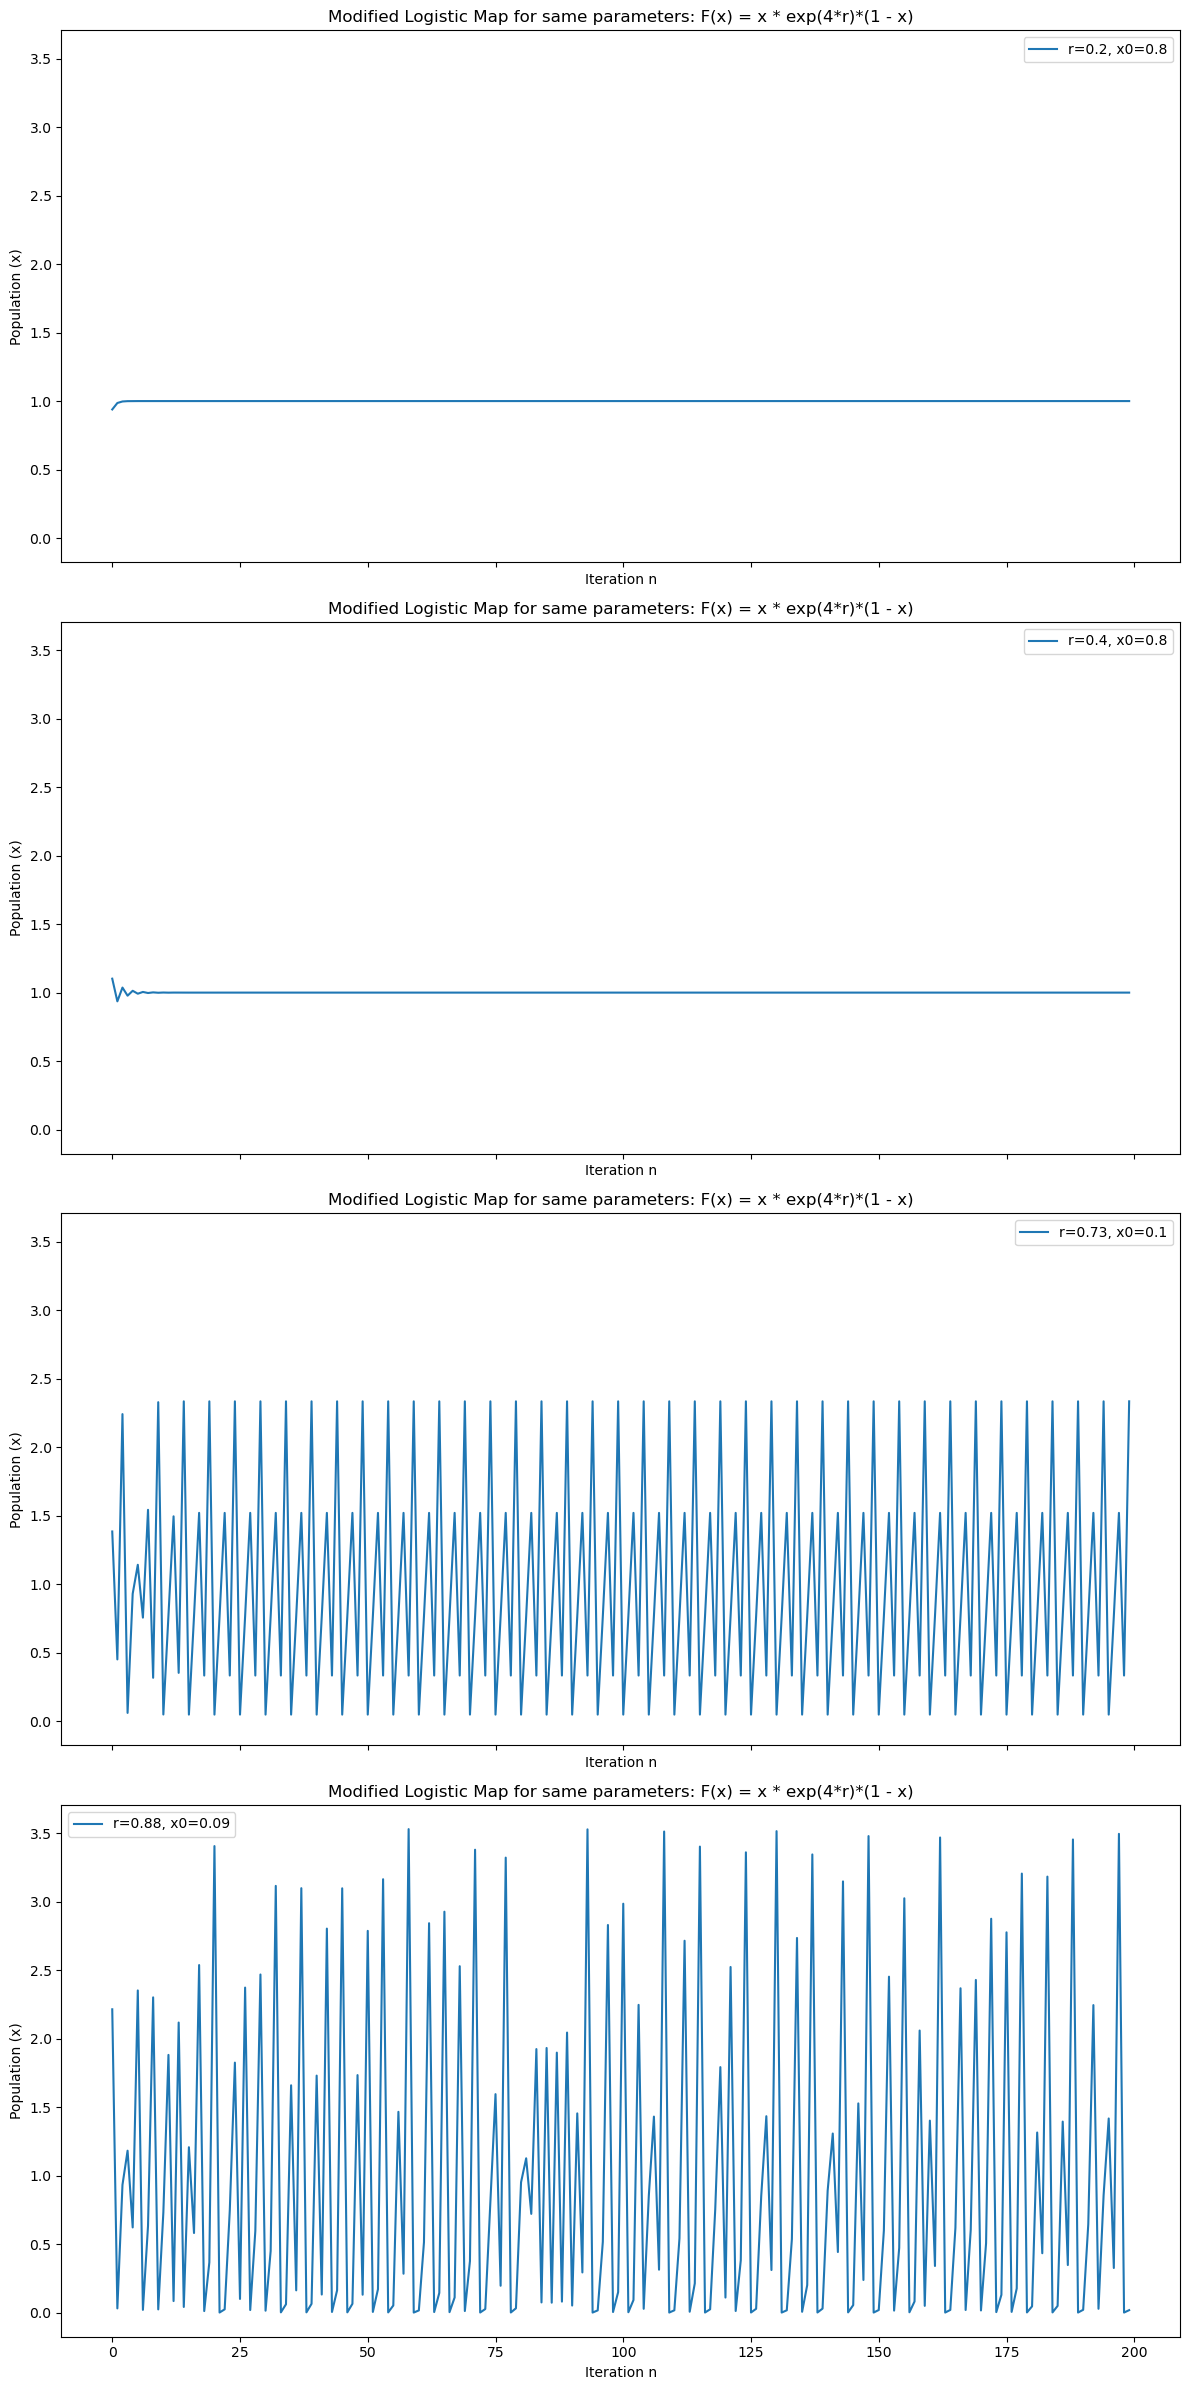

In [24]:
import numpy as np
import matplotlib.pyplot as plt

def modified_logistic_map(r, x, n):
    result = []
    for _ in range(n):
        x = x * np.exp(4*r*(1 - x))
        result.append(x)
    return result

# Parameters
n_iterations = 200
x0_values = [0.8, 0.8, 0.1, 0.09]
r_values = [0.2, 0.4, 0.73, 0.88]

# Create a bifurcation diagram

fig, axs = plt.subplots(len(x0_values), 1, figsize=(12, 6 * len(x0_values)), sharex=True, sharey=True)

for ax, x0, r in zip(axs, x0_values, r_values):
    x_values = modified_logistic_map(r, x0, n_iterations)
    ax.plot(range(n_iterations), x_values, label=f'r={r}, x0={x0}')
        

    ax.set_title('Modified Logistic Map for same parameters: F(x) = x * exp(4*r)*(1 - x)')
    ax.set_xlabel('Iteration n')
    ax.set_ylabel('Population (x)')
    ax.legend ()
    
plt.tight_layout()
plt.show()

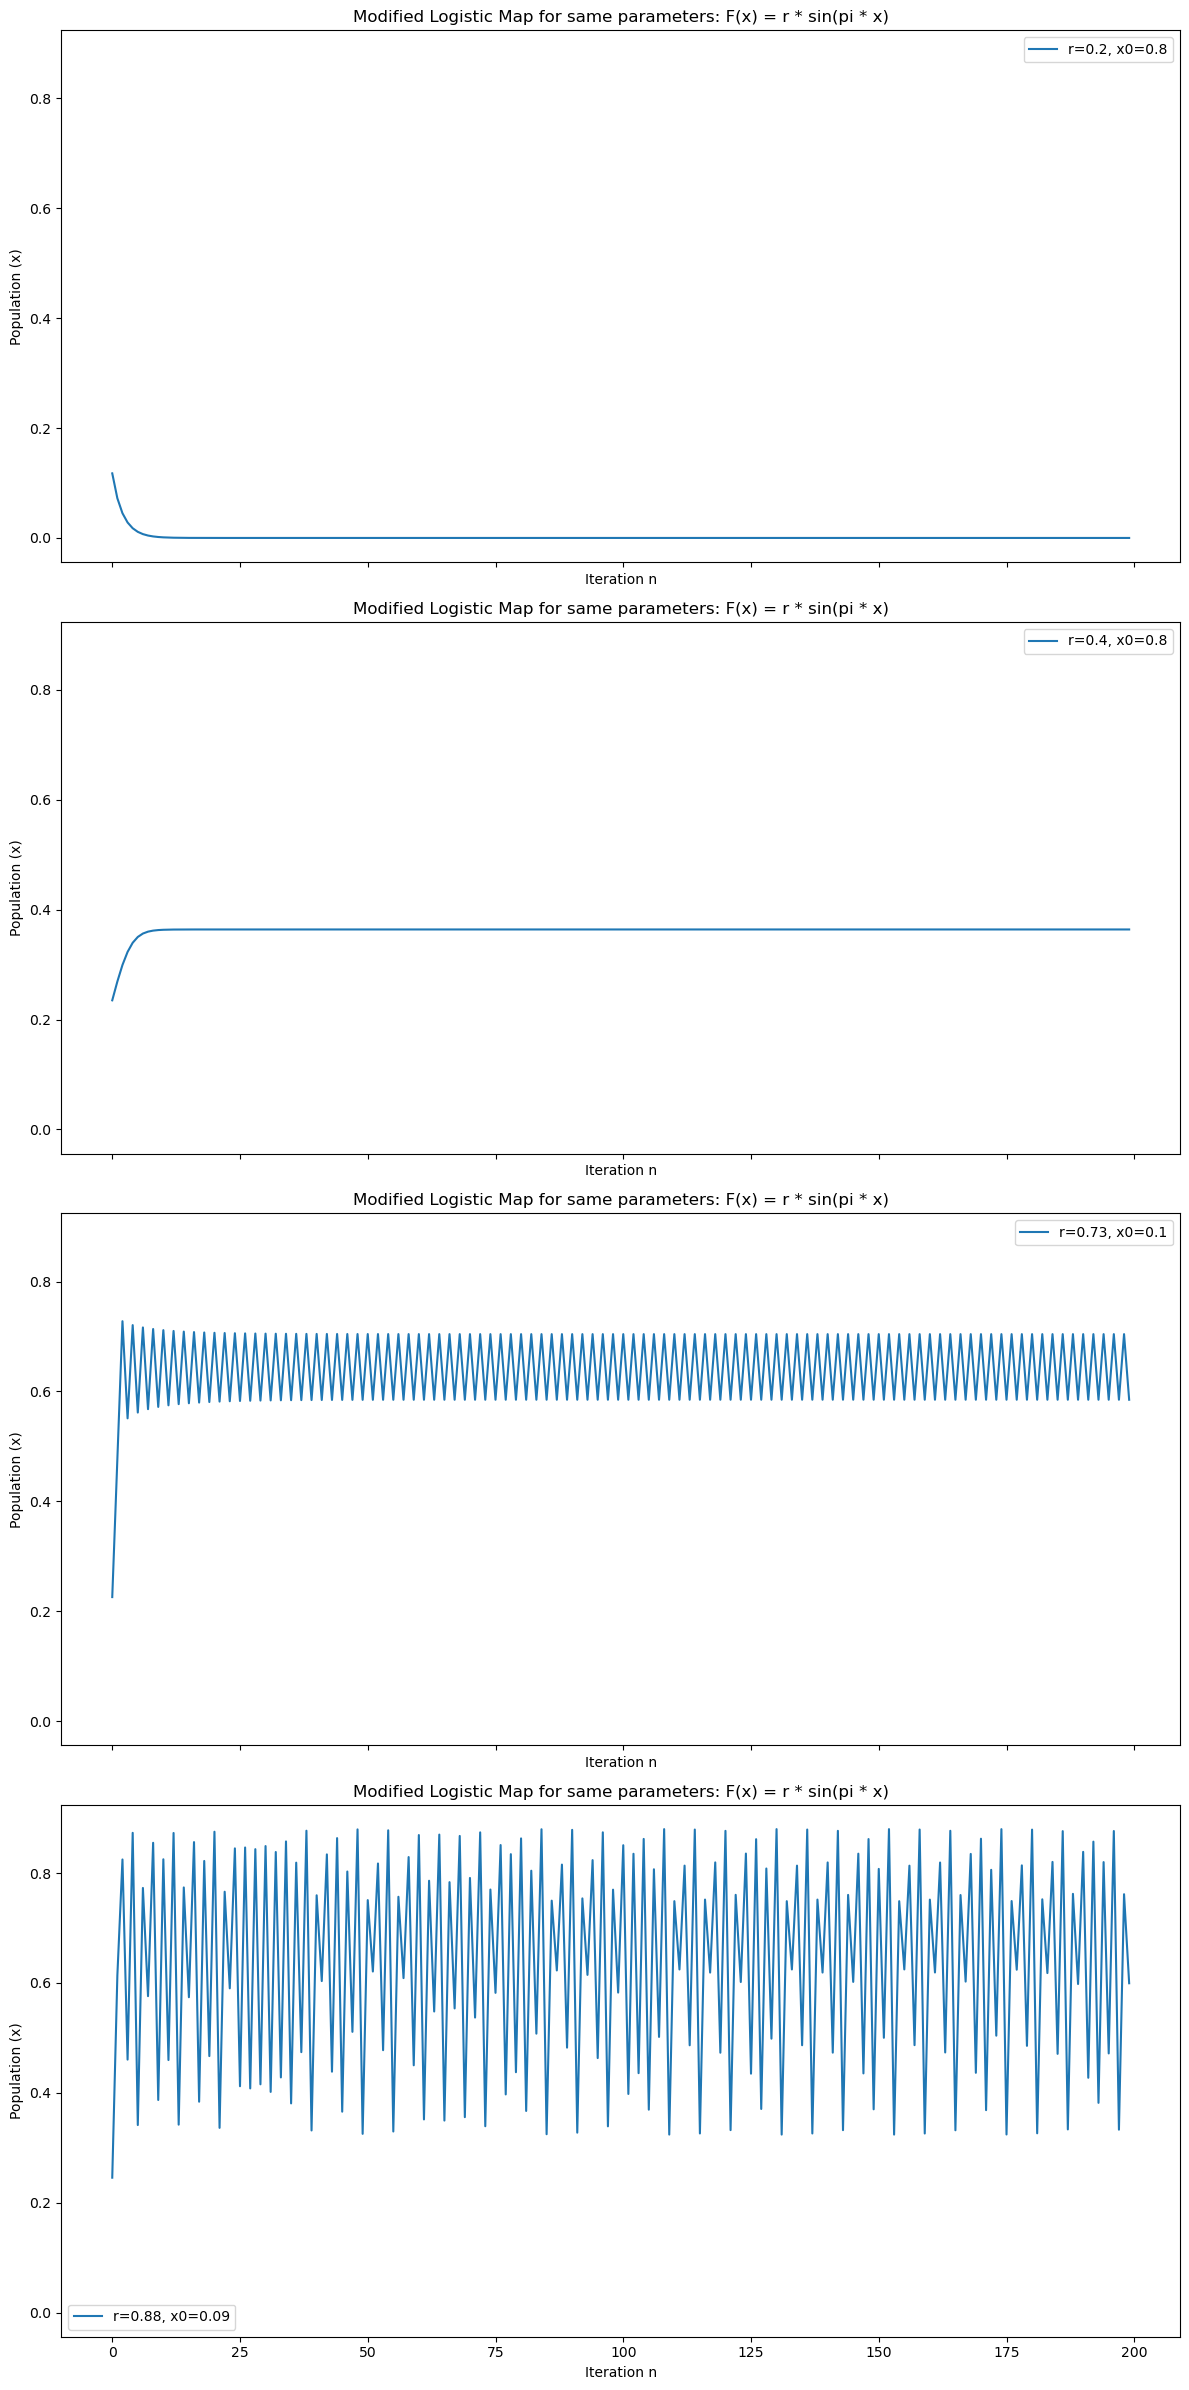

In [44]:
import numpy as np
import matplotlib.pyplot as plt

def modified2_logistic_map(r, x, n):
    result = []
    for _ in range(n):
        x = r * np.sin(np.pi * x)
        result.append(x)
    return result

# Parameters
n_iterations = 200
x0_values = [0.8, 0.8, 0.1, 0.09]
r_values = [0.2, 0.4, 0.73, 0.88]

# Create a bifurcation diagram

fig, axs = plt.subplots(len(x0_values), 1, figsize=(12, 6 * len(x0_values)), sharex=True, sharey=True)

for ax, x0, r in zip(axs, x0_values, r_values):
    x_values = modified2_logistic_map(r, x0, n_iterations)
    ax.plot(range(n_iterations), x_values, label=f'r={r}, x0={x0}')
        

    ax.set_title('Modified Logistic Map for same parameters: F(x) = r * sin(pi * x)')
    ax.set_xlabel('Iteration n')
    ax.set_ylabel('Population (x)')
    ax.legend ()
    
plt.tight_layout()
plt.show()

<font size='4'> Part c) Here, first the same logistic map was obtained as in the first problem for the specified parameters of r=0.92 and x0=0.6. Next, another logistic map was created with the parameters set to r=0.92 and x0=6.0001. The difference between these two arrays was computed and this difference was plotted as the difference between 2 trajectories adhering to the equation given in the question. </font>

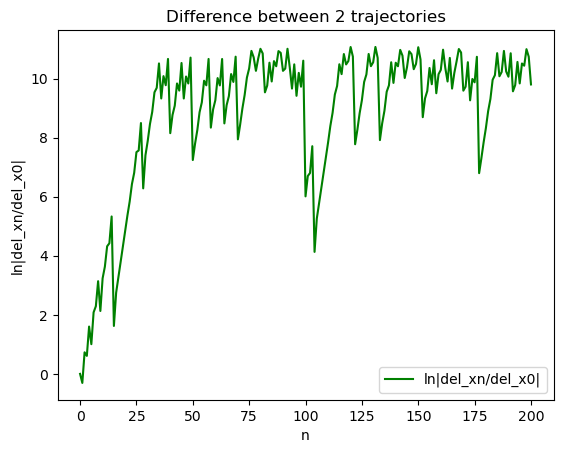

In [41]:
import numpy as np
import matplotlib.pyplot as plt

N = 201

def logistic_map(x0, r):
    x = np.zeros(N)
    x[0] = x0

    for n in range(N - 1):
        x[n + 1] = 4 * r * x[n] * (1 - x[n])

    return x

a = logistic_map(0.6, 0.92)
b = logistic_map(0.60001, 0.92)
c = np.log(np.abs((a - b) / 1e-5))
x = np.linspace(0, N - 1, N)

# Uncomment the following two lines to plot the original trajectories
#plt.plot(x, a, color="blue", label='Trajectory a')
#plt.plot(x, b, color="red", label='Trajectory b')

plt.plot(x, c, color="green", label='ln|del_xn/del_x0|')
plt.xlabel('n')
plt.ylabel('ln|del_xn/del_x0|')
plt.title('Difference between 2 trajectories')
plt.legend()

plt.show()


<font size='4'> Part d)

- First, three different functions were defined for the three different maps required (logistic, exponential and sine).

- a function Lyapunov was defined which: The function below first computes the derivatives of the generated map array passed into the function from one of the functions above. Next, the sum of the derivatives is calculated and then divided by the size of the derivative array to get the Lyapunov value, which is returned.

- Following this, some parameters were defined which ran the algorithm and generated arrays for Lyapunov’s exponent depending on the r value. These arrays were then plotted (m against r).
</font>

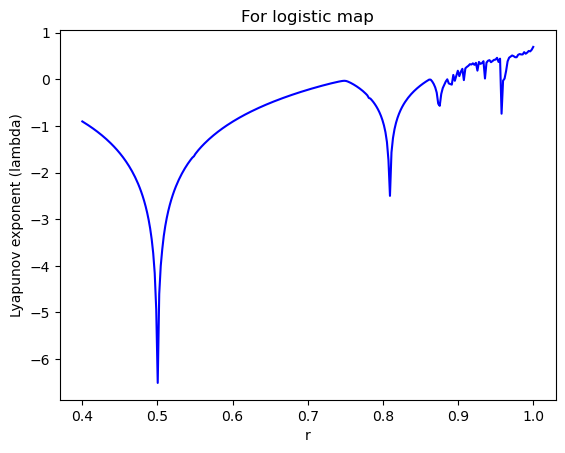

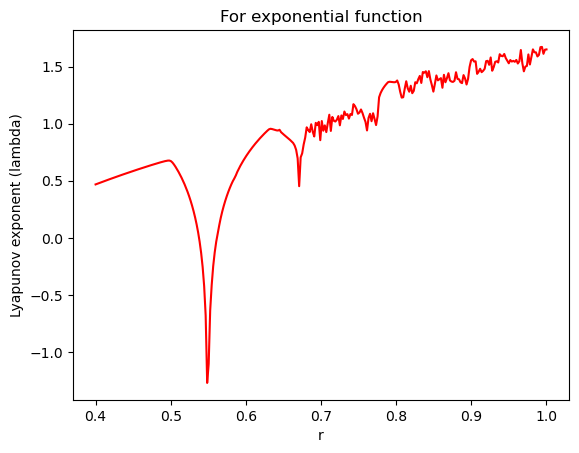

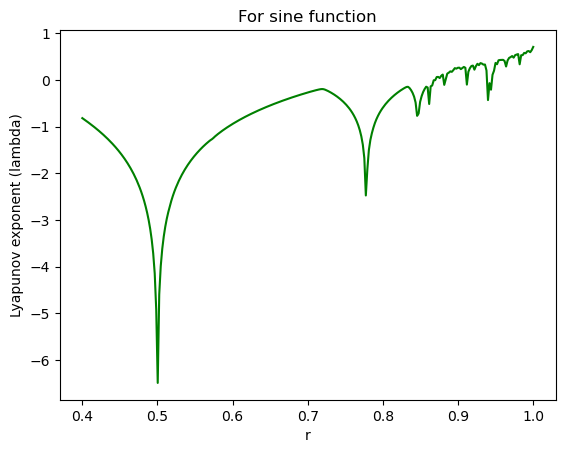

In [43]:
import numpy as np
import matplotlib.pyplot as plt

def logistic_map(x0, r):
    N = 201
    x = np.zeros(N)
    x[0] = x0
    for n in range(1, N):
        x[n] = 4 * r * x[n-1] * (1 - x[n-1])
    return x

def exp_func(x0, r):
    N = 201
    x = np.zeros(N)
    x[0] = x0
    for n in range(1, N):
        x[n] = x[n-1] * np.exp(4 * r * (1 - x[n-1]))
    return x

def sin_func(x0, r):
    N = 201
    x = np.zeros(N)
    x[0] = x0
    for n in range(1, N):
        x[n] = r * np.sin(np.pi * x[n-1])
    return x

def lyapunov_exponent(map_values, r):
    derivatives = 4 * r * (1 - 2 * map_values)
    lyapunov_sum = np.sum(np.log(np.abs(derivatives)))
    return lyapunov_sum / len(derivatives)

def plot_lyapunov(map_function, color, title):
    K = 300
    rr = np.linspace(0.4, 1, K)
    lyapunov_values = np.zeros(K)

    for i in range(K):
        map_values = map_function(0.8, rr[i])
        lyapunov_values[i] = lyapunov_exponent(map_values, rr[i])

    plt.plot(rr, lyapunov_values, color=color)
    plt.xlabel('r')
    plt.ylabel('Lyapunov exponent (lambda)')
    plt.title(title)
    plt.show()

plot_lyapunov(logistic_map, 'blue', 'For logistic map')
plot_lyapunov(exp_func, 'red', 'For exponential function')
plot_lyapunov(sin_func, 'green', 'For sine function')

